In [34]:
import csv
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

# figures inline in notebook
%matplotlib inline

np.set_printoptions(suppress=True)

In [4]:
def funReadData(path):
    df = pd.read_csv(path, encoding = 'ISO-8859-1')
    return df

In [5]:
#defining filedirectory
fileDir = os.path.dirname(os.path.realpath('__file__'))

In [12]:
#defining data frames
df = pd.DataFrame()

In [13]:
#reading loan data stats
for directory, subdirectory, filenames in  os.walk(fileDir + '/data/processed_data/'):
    for filename in filenames:
        if filename == 'purchase_data.csv':
            df = funReadData(os.path.join(directory, filename))

In [19]:
#defining required columns
columns = ['location', 'group_size', 'homeowner', 'car_age', 'risk_factor', 'age_oldest', 'age_youngest', 
           'married_couple', 'C_previous', 'duration_previous','A', 'B','C','D','E','F','G', 'hour', 'is_weekend', 'is_family', 
           'agediff', 'is_individual', 'state_code', 'car_value_code']

In [20]:
df_corr = df[columns]

# Feature Selection

In [30]:
corr_col = ['A', 'B','C','D','E','F','G']

In [32]:
df_corr_col = df_corr[corr_col]

# Correlation between all Coverages

In [36]:
corrmat = df_corr_col.corr()
corrmat

,A,B,C,D,E,F,G
A,1.000000,0.128190,0.165109,0.140989,0.329099,0.526955,0.091413
B,0.128190,1.000000,0.066395,0.075510,0.400811,0.115115,0.028904
C,0.165109,0.066395,1.000000,0.608680,0.192800,-0.028999,0.161276
D,0.140989,0.075510,0.608680,1.000000,0.167476,-0.008462,0.169404
E,0.329099,0.400811,0.192800,0.167476,1.000000,0.168890,0.131849
F,0.526955,0.115115,-0.028999,-0.008462,0.168890,1.000000,0.104624
G,0.091413,0.028904,0.161276,0.169404,0.131849,0.104624,1.000000


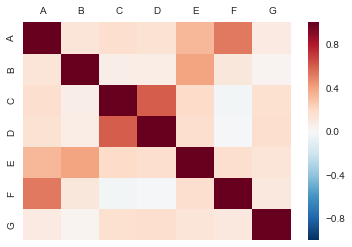

In [37]:
sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

### Most Highly Correlated

In [52]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

In [53]:
mosthighlycorrelated(df_corr_col, 20)

,FirstVariable,SecondVariable,Correlation
0,C,D,0.608680
1,A,F,0.526955
2,B,E,0.400811
3,A,E,0.329099
4,C,E,0.192800
5,D,G,0.169404
6,E,F,0.168890
7,D,E,0.167476
8,A,C,0.165109
9,C,G,0.161276


In [61]:
coverages_mostHighlyRelated = mosthighlycorrelated(df_corr_col, 20)
# coverages_mostHighlyRelated.sort_values(coverages_mostHighlyRelated.Correlation ,ascending=True,inplace=True)

# Pearson

In [73]:
df_corr_col.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)